In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, make_scorer, r2_score
import warnings
warnings.filterwarnings("ignore")


Load data

In [6]:
# Read the CSV file into a pandas DataFrame
df_wine = pd.read_csv("winequality.csv", delimiter=';')

In [14]:
print(df_wine)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [18]:
x = df_wine.drop(columns=['quality'])
y =  df_wine.iloc[:, -1]

In [73]:
# Training with train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=3000)

In [74]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3000, 11)
(3000,)
(1898, 11)
(1898,)


Build model

In [75]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(x_train.shape[1],1)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

In [76]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 11)                0         
                                                                 
 dense_6 (Dense)             (None, 256)               3072      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 3329 (13.00 KB)
Trainable params: 3329 (13.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile

In [77]:
model.compile(optimizer='adam',
                loss='mse',
                metrics=['mae'])

In [79]:
model.fit(x_train, y_train, epochs = 20)

Epoch 1/20
94/94 [==============================] - 0s 5ms/step - loss: 0.7088 - mae: 0.6578
Epoch 2/20
94/94 [==============================] - 0s 5ms/step - loss: 0.7184 - mae: 0.6641
Epoch 3/20
94/94 [==============================] - 1s 5ms/step - loss: 0.6992 - mae: 0.6548
Epoch 4/20
94/94 [==============================] - 1s 6ms/step - loss: 0.6900 - mae: 0.6507
Epoch 5/20
94/94 [==============================] - 1s 5ms/step - loss: 0.6845 - mae: 0.6518
Epoch 6/20
94/94 [==============================] - 0s 4ms/step - loss: 0.7161 - mae: 0.6637
Epoch 7/20
94/94 [==============================] - 1s 6ms/step - loss: 0.6803 - mae: 0.6470
Epoch 8/20
94/94 [==============================] - 1s 6ms/step - loss: 0.6980 - mae: 0.6557
Epoch 9/20
94/94 [==============================] - 1s 6ms/step - loss: 0.6917 - mae: 0.6531
Epoch 10/20
94/94 [==============================] - 1s 7ms/step - loss: 0.6894 - mae: 0.6508
Epoch 11/20
94/94 [==============================] - 1s 6ms/step - lo

In [80]:
y_pred = model.predict(x_test)

60/60 [==============================] - 0s 2ms/step


In [81]:
print(r2_score(y_test, y_pred))

0.28657490826832066


In [83]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(x_train, y_train, epochs=20, callbacks=[callbacks], validation_split=0.2)
len(history.history['val_loss'][1:])

Epoch 1/20
75/75 [==============================] - 0s 6ms/step - loss: 0.6626 - mae: 0.6364 - val_loss: 0.6212 - val_mae: 0.6125
Epoch 2/20
75/75 [==============================] - 0s 5ms/step - loss: 0.6488 - mae: 0.6300 - val_loss: 0.5983 - val_mae: 0.5985
Epoch 3/20
75/75 [==============================] - 0s 5ms/step - loss: 0.6667 - mae: 0.6405 - val_loss: 0.6244 - val_mae: 0.6134
Epoch 4/20
75/75 [==============================] - 0s 6ms/step - loss: 0.6488 - mae: 0.6304 - val_loss: 0.5960 - val_mae: 0.5965
Epoch 5/20
75/75 [==============================] - 0s 5ms/step - loss: 0.6568 - mae: 0.6376 - val_loss: 0.5918 - val_mae: 0.5964
Epoch 6/20
75/75 [==============================] - 1s 8ms/step - loss: 0.6717 - mae: 0.6452 - val_loss: 0.6116 - val_mae: 0.6019
Epoch 7/20
75/75 [==============================] - 1s 8ms/step - loss: 0.6358 - mae: 0.6208 - val_loss: 0.5947 - val_mae: 0.5967
Epoch 8/20
75/75 [==============================] - 0s 5ms/step - loss: 0.6534 - mae: 0.63

7

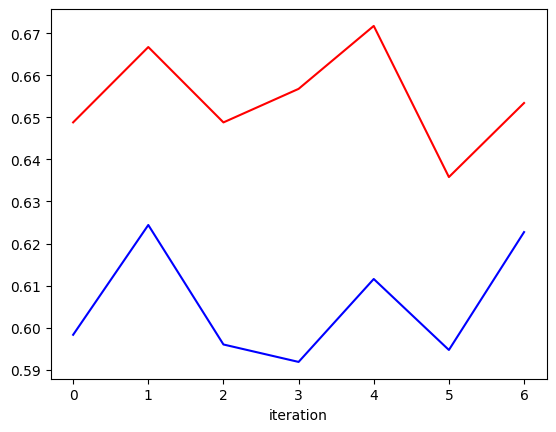

In [95]:
plt.plot(history.history['loss'][1:],color='red', label='loss')
plt.plot(history.history["val_loss"][1:], color='blue', label='val_loss')
plt.xlabel('iteration')

plt.show()